<a href="https://colab.research.google.com/github/olawale0254/NFTValuation-Task/blob/master/modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Data Importation and Pre-processing

In [3]:
token_sales = pd.read_csv('/content/drive/MyDrive/20230509/token_sales.csv')[['token_index',	'timestamp',	'eth']]
token_sales['date'] = pd.to_datetime(token_sales['timestamp'], unit='s').dt.strftime('%Y-%m-%d')
token_sales.head()

,token_index,timestamp,eth,date
0,544,1498251906,0.01,2017-06-23
1,3134,1498252232,0.01,2017-06-23
2,5056,1498254413,0.10,2017-06-23
3,5719,1498255065,0.04,2017-06-23
4,6548,1498255212,0.03,2017-06-23


In [4]:
token_sales.isnull().sum()

token_index    0
timestamp      0
eth            0
date           0
dtype: int64

In [5]:
# token_sales.shape
token_sales.columns

Index(['token_index', 'timestamp', 'eth', 'date'], dtype='object')

In [6]:
token_metadata = pd.read_csv('/content/drive/MyDrive/20230509/token_metadata.csv')
token_metadata.head()

,Skin Tone,Type,Hair,Eyewear,Mouth,Headwear,Facial Hair,Smoking Device,Other:Earring,Neckwear,Skin Feature,Other:Medical Mask,Other:Clown Nose,Trait Count,rarest_property_name,token_index,rarity_score
0,Medium,Female,Blonde Bob,Green Eye Shadow,NaN,NaN,NaN,NaN,Earring,NaN,NaN,NaN,NaN,5 Trait Count,Hair:Blonde Bob,0,117.119410
1,Darker,Male,Mohawk,NaN,Smile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 Trait Count,Mouth:Smile,1,72.698512
2,Lighter,Female,Wild Hair,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3 Trait Count,Hair:Wild Hair,2,58.332241
3,Darker,Male,Wild Hair,Nerd Glasses,NaN,NaN,NaN,Pipe,NaN,NaN,NaN,NaN,NaN,5 Trait Count,Smoking Device:Pipe,3,78.818332
4,Medium,Male,Wild Hair,Big Shades,NaN,NaN,Goat,NaN,Earring,NaN,NaN,NaN,NaN,6 Trait Count,Facial Hair:Goat,4,91.025350


In [7]:
usd_eth = pd.read_csv('/content/drive/MyDrive/20230509/eth_usd_fx_rates.csv')
usd_eth['date'] = pd.to_datetime(usd_eth['date'], format="%d/%m/%Y").dt.strftime("%d-%m-%Y")
usd_eth.head()

,date,open
0,31-12-2016,8.162
1,01-01-2017,8.018
2,02-01-2017,8.154
3,03-01-2017,8.335
4,04-01-2017,9.639


In [8]:
##normalize the dates 
token_sales['date'] = pd.to_datetime(token_sales['date'])
usd_eth['date']  = pd.to_datetime(usd_eth['date'])

<ipython-input-8-2ce13d22b534>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  usd_eth['date']  = pd.to_datetime(usd_eth['date'])


In [9]:
sales_usdeth = pd.merge(usd_eth,token_sales, on='date').sort_values(by=['token_index'], ascending=[True]).drop(columns=['timestamp'])
sales_usdeth.head()

,date,open,token_index,eth
289,2017-06-23,320.97,0,0.98
1876,2018-11-30,117.76,0,25.00
465,2017-07-07,265.88,0,1.60
341,2017-06-26,279.36,1,0.42
4598,2020-11-30,576.00,1,60.00


In [10]:
token_metadata.shape

(10000, 17)

In [11]:
metadate_sales = pd.merge(token_metadata, sales_usdeth, on='token_index')
metadate_sales.head()

,Skin Tone,Type,Hair,Eyewear,Mouth,Headwear,Facial Hair,Smoking Device,Other:Earring,Neckwear,Skin Feature,Other:Medical Mask,Other:Clown Nose,Trait Count,rarest_property_name,token_index,rarity_score,date,open,eth
0,Medium,Female,Blonde Bob,Green Eye Shadow,NaN,NaN,NaN,NaN,Earring,NaN,NaN,NaN,NaN,5 Trait Count,Hair:Blonde Bob,0,117.119410,2017-06-23,320.97,0.98
1,Medium,Female,Blonde Bob,Green Eye Shadow,NaN,NaN,NaN,NaN,Earring,NaN,NaN,NaN,NaN,5 Trait Count,Hair:Blonde Bob,0,117.119410,2018-11-30,117.76,25.00
2,Medium,Female,Blonde Bob,Green Eye Shadow,NaN,NaN,NaN,NaN,Earring,NaN,NaN,NaN,NaN,5 Trait Count,Hair:Blonde Bob,0,117.119410,2017-07-07,265.88,1.60
3,Darker,Male,Mohawk,NaN,Smile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 Trait Count,Mouth:Smile,1,72.698512,2017-06-26,279.36,0.42
4,Darker,Male,Mohawk,NaN,Smile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 Trait Count,Mouth:Smile,1,72.698512,2020-11-30,576.00,60.00


In [12]:
token_sales.shape

(21329, 4)

In [13]:
metadate_sales.isnull().sum()

Skin Tone                   0
Type                        0
Hair                     7399
Eyewear                  8080
Mouth                   15449
Headwear                13547
Facial Hair             12885
Smoking Device          17417
Other:Earring           15311
Neckwear                19785
Skin Feature            18323
Other:Medical Mask      20139
Other:Clown Nose        20078
Trait Count                 0
rarest_property_name        0
token_index                 0
rarity_score                0
date                        0
open                        0
eth                         0
dtype: int64

My observation here is that we cannot fill missing values based on mode. It is better we fill with none to make every features unique. 


In [14]:
metadate_sales.columns

Index(['Skin Tone', 'Type', 'Hair', 'Eyewear', 'Mouth', 'Headwear',
       'Facial Hair', 'Smoking Device', 'Other:Earring', 'Neckwear',
       'Skin Feature', 'Other:Medical Mask', 'Other:Clown Nose', 'Trait Count',
       'rarest_property_name', 'token_index', 'rarity_score', 'date', 'open',
       'eth'],
      dtype='object')

In [15]:
###fill missing values for the traites with none
traits = ['Hair', 'Eyewear', 'Mouth', 'Headwear',
       'Facial Hair', 'Smoking Device', 'Other:Earring', 'Neckwear',
       'Skin Feature', 'Other:Medical Mask', 'Other:Clown Nose']
for data in traits:
    metadate_sales[data].fillna("None", inplace=True)

In [16]:
metadate_sales.isnull().sum()

Skin Tone               0
Type                    0
Hair                    0
Eyewear                 0
Mouth                   0
Headwear                0
Facial Hair             0
Smoking Device          0
Other:Earring           0
Neckwear                0
Skin Feature            0
Other:Medical Mask      0
Other:Clown Nose        0
Trait Count             0
rarest_property_name    0
token_index             0
rarity_score            0
date                    0
open                    0
eth                     0
dtype: int64

In [17]:
def create_date_feature(df):
  df['date'] = pd.to_datetime(df['date'])
  df['day'] = df['date'].dt.day
  df['month'] = df['date'].dt.month
  df['year'] = df['date'].dt.year
  # Drop the original 'date' column
  # df.drop('date', axis=1, inplace=True)
  return df 

In [18]:
metadate_sales_dt = create_date_feature(metadate_sales)

In [19]:
metadate_sales_dt.head()

,Skin Tone,Type,Hair,Eyewear,Mouth,Headwear,Facial Hair,Smoking Device,Other:Earring,Neckwear,...,Trait Count,rarest_property_name,token_index,rarity_score,date,open,eth,day,month,year
0,Medium,Female,Blonde Bob,Green Eye Shadow,None,None,None,None,Earring,None,...,5 Trait Count,Hair:Blonde Bob,0,117.119410,2017-06-23,320.97,0.98,23,6,2017
1,Medium,Female,Blonde Bob,Green Eye Shadow,None,None,None,None,Earring,None,...,5 Trait Count,Hair:Blonde Bob,0,117.119410,2018-11-30,117.76,25.00,30,11,2018
2,Medium,Female,Blonde Bob,Green Eye Shadow,None,None,None,None,Earring,None,...,5 Trait Count,Hair:Blonde Bob,0,117.119410,2017-07-07,265.88,1.60,7,7,2017
3,Darker,Male,Mohawk,None,Smile,None,None,None,None,None,...,4 Trait Count,Mouth:Smile,1,72.698512,2017-06-26,279.36,0.42,26,6,2017
4,Darker,Male,Mohawk,None,Smile,None,None,None,None,None,...,4 Trait Count,Mouth:Smile,1,72.698512,2020-11-30,576.00,60.00,30,11,2020


## Encoding Cat Features 

In [20]:
from sklearn.preprocessing import OneHotEncoder

cat_cols = ['Skin Tone', 'Type', 'Hair', 'Eyewear', 'Mouth', 'Headwear',
       'Facial Hair', 'Smoking Device', 'Other:Earring', 'Neckwear',
       'Skin Feature', 'Other:Medical Mask', 'Other:Clown Nose', 'Trait Count',
       'rarest_property_name']


In [21]:
# Extract the categorical columns from the DataFrame
cat_data = metadate_sales_dt[cat_cols]

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform the categorical data
encoded_data = encoder.fit_transform(cat_data)

# Create a new DataFrame with the encoded categorical data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cat_cols))

# Concatenate the encoded DataFrame with the remaining columns from the original DataFrame
df_encoded = pd.concat([metadate_sales_dt.drop(cat_cols, axis=1), encoded_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [22]:
df_encoded

,token_index,rarity_score,date,open,eth,day,month,year,Skin Tone_Albino,Skin Tone_Alien,...,rarest_property_name_Skin Tone:Albino,rarest_property_name_Skin Tone:Alien,rarest_property_name_Skin Tone:Ape,rarest_property_name_Skin Tone:Darker,rarest_property_name_Skin Tone:Lighter,rarest_property_name_Skin Tone:Medium,rarest_property_name_Skin Tone:Zombie,rarest_property_name_Smoking Device:Cigarette,rarest_property_name_Smoking Device:Pipe,rarest_property_name_Smoking Device:Vape
0,0,117.119410,2017-06-23,320.97,0.98,23,6,2017,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,117.119410,2018-11-30,117.76,25.00,30,11,2018,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,117.119410,2017-07-07,265.88,1.60,7,7,2017,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,72.698512,2017-06-26,279.36,0.42,26,6,2017,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,72.698512,2020-11-30,576.00,60.00,30,11,2020,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20475,9990,55.655401,2021-03-20,1809.76,24.50,20,3,2021,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20476,9997,306.081831,2021-02-08,2556.41,99.99,8,2,2021,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
20477,9998,124.040014,2021-08-11,4617.13,110.00,11,8,2021,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20478,9998,124.040014,2020-12-27,636.07,15.00,27,12,2020,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
df_encoded.shape

(20480, 220)

In [24]:
value_counts = df_encoded['token_index'].value_counts()
print(value_counts)

7834    34
8922    28
5967    28
1482    26
4841    26
        ..
2857     1
2854     1
2851     1
2849     1
5311     1
Name: token_index, Length: 6847, dtype: int64


In [25]:
len(value_counts[value_counts == 2].index)

1461

In [26]:
len(value_counts[value_counts == 1].index)

1890

For now, I will drop the token_index that have less than 3 transactions as it will cause abnomalities in the modelling. If we have enough data we can add them

In [27]:
indices_to_drop = value_counts[value_counts < 3].index
data_filtered = df_encoded[~df_encoded['token_index'].isin(indices_to_drop)]
data_filtered.head()

,token_index,rarity_score,date,open,eth,day,month,year,Skin Tone_Albino,Skin Tone_Alien,...,rarest_property_name_Skin Tone:Albino,rarest_property_name_Skin Tone:Alien,rarest_property_name_Skin Tone:Ape,rarest_property_name_Skin Tone:Darker,rarest_property_name_Skin Tone:Lighter,rarest_property_name_Skin Tone:Medium,rarest_property_name_Skin Tone:Zombie,rarest_property_name_Smoking Device:Cigarette,rarest_property_name_Smoking Device:Pipe,rarest_property_name_Smoking Device:Vape
0,0,117.119410,2017-06-23,320.97,0.98,23,6,2017,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,117.119410,2018-11-30,117.76,25.00,30,11,2018,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,117.119410,2017-07-07,265.88,1.60,7,7,2017,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,72.698512,2017-06-26,279.36,0.42,26,6,2017,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,72.698512,2020-11-30,576.00,60.00,30,11,2020,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
data_filtered.shape

(15668, 220)

In [29]:
data_filtered.sort_values('date', inplace=True)

<ipython-input-29-0eb8ba2ea6b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered.sort_values('date', inplace=True)


I will be spliting the data in a unique way. I will be selecting the newest data based on date for each group for my test and i will train on the rest

In [30]:
latest_test = data_filtered.loc[data_filtered.groupby('token_index')['date'].idxmax()]

In [31]:
latest_test

,token_index,rarity_score,date,open,eth,day,month,year,Skin Tone_Albino,Skin Tone_Alien,...,rarest_property_name_Skin Tone:Albino,rarest_property_name_Skin Tone:Alien,rarest_property_name_Skin Tone:Ape,rarest_property_name_Skin Tone:Darker,rarest_property_name_Skin Tone:Lighter,rarest_property_name_Skin Tone:Medium,rarest_property_name_Skin Tone:Zombie,rarest_property_name_Smoking Device:Cigarette,rarest_property_name_Smoking Device:Pipe,rarest_property_name_Smoking Device:Vape
1,0,117.119410,2018-11-30,117.76,25.00,30,11,2018,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,72.698512,2020-11-30,576.00,60.00,30,11,2020,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,14,239.465714,2018-12-07,445.94,2.50,7,12,2018,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,53,93.656590,2021-08-23,3241.65,129.99,23,8,2021,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,89,244.508607,2020-09-06,246.47,19.99,6,9,2020,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20454,9972,86.834511,2022-02-28,2617.32,74.95,28,2,2022,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20460,9976,108.312788,2020-01-10,359.82,1.50,10,1,2020,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20463,9980,136.998643,2023-04-14,2013.84,56.00,14,4,2023,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20472,9982,63.938023,2022-03-09,1575.91,78.00,9,3,2022,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# test_data = data_filtered[data_filtered['date'].isin(latest_test)]

In [33]:
# test_data

In [34]:
train_data = data_filtered[~data_filtered.index.isin(latest_test.index)]
train_data.head()

,token_index,rarity_score,date,open,eth,day,month,year,Skin Tone_Albino,Skin Tone_Alien,...,rarest_property_name_Skin Tone:Albino,rarest_property_name_Skin Tone:Alien,rarest_property_name_Skin Tone:Ape,rarest_property_name_Skin Tone:Darker,rarest_property_name_Skin Tone:Lighter,rarest_property_name_Skin Tone:Medium,rarest_property_name_Skin Tone:Zombie,rarest_property_name_Smoking Device:Cigarette,rarest_property_name_Smoking Device:Pipe,rarest_property_name_Smoking Device:Vape
0,0,117.119410,2017-06-23,320.97,0.980,23,6,2017,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17806,8781,111.908357,2017-06-23,320.97,0.116,23,6,2017,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10800,5621,112.757075,2017-06-23,320.97,0.030,23,6,2017,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2471,1841,84.150533,2017-06-23,320.97,0.250,23,6,2017,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13857,6934,83.801357,2017-06-23,320.97,0.090,23,6,2017,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
print(train_data.shape)
print(latest_test.shape)

(12172, 220)
(3496, 220)


In [36]:
train_data.drop('date', axis=1, inplace=True)
latest_test.drop('date', axis=1, inplace=True)

<ipython-input-36-ed36d8affedf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop('date', axis=1, inplace=True)


In [37]:
ytest = latest_test['eth']
ytrain = train_data['eth']

## Modelling

In [38]:
from pycaret.regression import *

s = setup(
    train_data,
    target="eth",
    transform_target=True,
    remove_multicollinearity=True,
    multicollinearity_threshold=0.90,
    experiment_name="first",
)

,Description,Value
0,Session id,8509
1,Target,eth
2,Target type,Regression
3,Original data shape,"(12172, 219)"
4,Transformed data shape,"(12172, 181)"
5,Transformed train set shape,"(8520, 181)"
6,Transformed test set shape,"(3652, 181)"
7,Numeric features,218
8,Preprocess,True
9,Imputation type,simple


In [39]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [40]:
best_model = compare_models(include=['ada', 'et','dt', 'gbr','xgboost','lightgbm'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,5.4631,774.9217,19.8690,0.8223,0.2617,1086852238514586.0000,7.4300
lightgbm,Light Gradient Boosting Machine,5.6920,828.8517,20.6154,0.8094,0.2629,1039116783661962.0000,1.1640
et,Extra Trees Regressor,5.5814,929.3758,22.3323,0.7752,0.2610,211191943983958.1875,19.3320
gbr,Gradient Boosting Regressor,8.6257,914.0412,23.8538,0.7440,0.3366,924134982563257.3750,3.3900
dt,Decision Tree Regressor,7.5542,1082.4813,26.5027,0.6808,0.3365,224794885640911.3750,0.9930
ada,AdaBoost Regressor,16.6766,1305.8931,31.5821,0.5310,0.9231,3289596747986833.0000,5.0830


Processing:   0%|          | 0/29 [00:00<?, ?it/s]

## Residual Plots

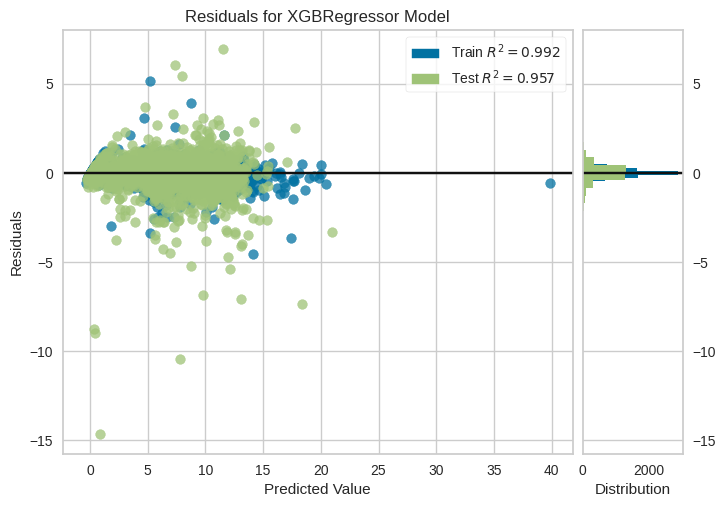

In [41]:
plot_model(best_model)

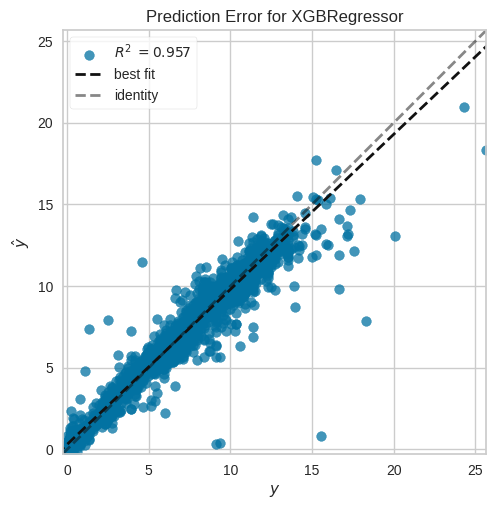

In [42]:
plot_model(best_model, plot = 'error')

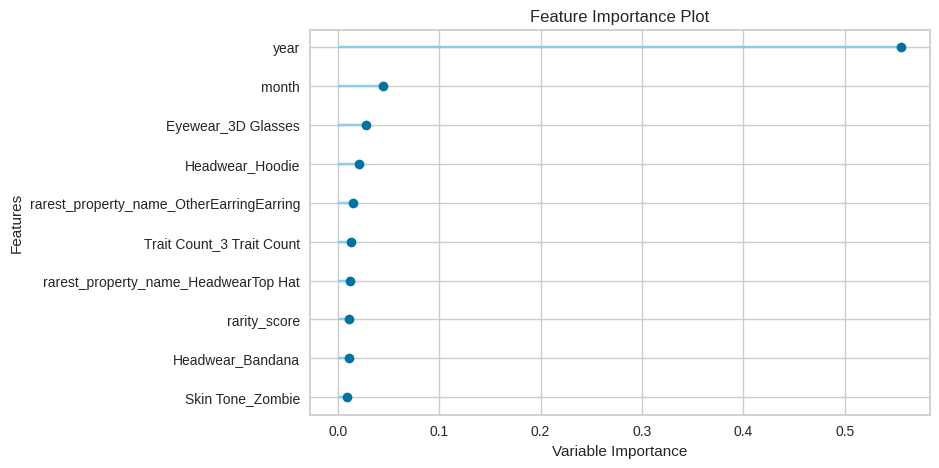

In [43]:
plot_model(best_model, plot='feature')

## Prediction

In [44]:
pred  = predict_model(best_model, data=latest_test)
pred.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,13.8451,5860.0229,76.5508,0.3997,0.2547,3929.6252


,token_index,rarity_score,open,day,month,year,Skin Tone_Albino,Skin Tone_Alien,Skin Tone_Ape,Skin Tone_Darker,...,rarest_property_name_Skin Tone:Ape,rarest_property_name_Skin Tone:Darker,rarest_property_name_Skin Tone:Lighter,rarest_property_name_Skin Tone:Medium,rarest_property_name_Skin Tone:Zombie,rarest_property_name_Smoking Device:Cigarette,rarest_property_name_Smoking Device:Pipe,rarest_property_name_Smoking Device:Vape,eth,prediction_label
1,0,117.119408,117.760002,30,11,2018,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.031212,6.933242
4,1,72.698509,576.000000,30,11,2020,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.092165,7.980761
6,14,239.465714,445.940002,7,12,2018,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.568014,1.891019
11,53,93.656593,3241.649902,23,8,2021,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.717868,82.817604
14,89,244.508606,246.470001,6,9,2020,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.394506,8.007652


In [45]:
final_pred = pred[["token_index", "prediction_label", 'eth']].rename(
    columns={"prediction_label": "last_sale_price",  'eth':'observed' }
)
final_pred.head()

,token_index,last_sale_price,observed
1,0,6.933242,6.031212
4,1,7.980761,9.092165
6,14,1.891019,1.568014
11,53,82.817604,12.717868
14,89,8.007652,5.394506


In [46]:
# Create a measure of accuracy
final_pred['Accuracy'] = 1 - abs(final_pred['last_sale_price'] - final_pred['observed']) / ((final_pred['last_sale_price'] + final_pred['observed']))

In [47]:
final_pred.sort_values('Accuracy', ascending=False).head(10)

,token_index,last_sale_price,observed,Accuracy
9467,4989,1.582349,1.589945,0.997605
1866,1537,1.346560,1.336490,0.996247
18532,9086,3.736599,3.837754,0.986645
10517,5471,1.290090,1.336490,0.982334
18810,9219,1.246154,1.185199,0.974930
14313,7158,0.686315,0.651798,0.974205
15621,7807,0.514510,0.546760,0.969612
1294,1244,1.419777,1.311984,0.960541
9439,4976,0.849789,0.783293,0.959281
9808,5153,1.388281,1.277217,0.958333
